# Import Libraries 

In [36]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as pyplot
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [37]:
df = pd.read_csv('./train.csv')

In [38]:
df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Data Cleaning 

In [39]:
# data cleaning
df = df[['GarageArea', 'SalePrice']]
df = df[df.GarageArea != 0]
df.isnull().sum()
df.describe()

,GarageArea,SalePrice
count,1379.000000,1379.00000
mean,500.762146,185479.51124
std,185.680520,79023.89060
min,160.000000,35311.00000
25%,380.000000,134000.00000
50%,484.000000,167500.00000
75%,580.000000,217750.00000
max,1418.000000,755000.00000


# Structuring the dataset 

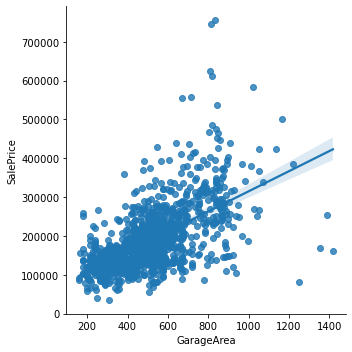

In [40]:


sb.lmplot(x='GarageArea',y='SalePrice',data=df,fit_reg=True)

# Interpretation of the Scatter Plot 

In [ ]:
## The concentrated data points close to the line of best fit indicate a strong positive relationship between Garage Area and Sale Price. Meaning Sale Price increase with increase in Garage Area.

# Hypothesis 

## The Large the Garage Area the higher the Sale Price 

In [41]:
x = df['GarageArea'].values.reshape(-1,1) 
y = df['SalePrice'].values.reshape(-1,1) 

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
regression = LinearRegression()
regression.fit(x_train,y_train)

y_predicted = regression.predict(x_test)
# y_predicted

In [44]:
print('Slope : ',regression.coef_)
print('Mean Squared error: ', mean_squared_error(y_test,y_predicted) )
print('Mean Squared error: ', np.square(np.subtract(y_test,y_predicted)).mean() )
print('R2 Score: ',r2_score(y_test,y_predicted))

Slope :  [[259.91791769]]
Mean Squared error:  3840842236.030792
Mean Squared error:  3840842236.030792
R2 Score:  0.3691557761693921


In [45]:
test_visual_data = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predicted.flatten()})
test_visual_data.head(10)

,Actual,Predicted
0,108480,139420.009568
1,105000,117067.068647
2,190000,193482.936447
3,176500,210897.436933
4,255000,279515.767203
5,190000,133441.897461
6,262500,249625.206668
7,311500,166711.390926
8,170000,158653.935477
9,119000,101471.993586
